# Getting the data ready
## Choosing machine learning model
### Fit model
#### evaluate model
##### Improve the model
##### saving the model
###### Summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [59]:
df = pd.read_csv("heart_disease_uci.csv")

In [60]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [61]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [63]:
df.isnull().mean() * 100

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [64]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [65]:
# Fill numeric columns with median
df.fillna({
    'trestbps': df['trestbps'].median(),
    'chol': df['chol'].median(),
    'thalch': df['thalch'].median(),
    'oldpeak': df['oldpeak'].median(),
}, inplace=True)

In [66]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca          611
thal        486
num           0
dtype: int64

In [67]:
# Fill categorical/binary columns with mode values safely
fill_values = {
    'fbs': df['fbs'].mode()[0],
    'restecg': df['restecg'].mode()[0],
    'exang': df['exang'].mode()[0],
}

df = df.fillna(value=fill_values)
df = df.infer_objects(copy=False)

C:\Users\umrab\AppData\Local\Temp\ipykernel_14884\852500911.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(value=fill_values)


In [68]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope       309
ca          611
thal        486
num           0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 102.6+ KB


In [70]:
# Handle slope (fill with mode)
df['slope'] = df['slope'].fillna(df['slope'].mode()[0])
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

In [71]:
df.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [72]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1
916,917,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0.0,normal,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0.0,normal,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,flat,0.0,normal,1


In [73]:
# Replace o with median
# Replace zero values with median
df.loc[df['trestbps'] == 0, 'trestbps'] = df['trestbps'].median()
df.loc[df['chol'] == 0, 'chol'] = df['chol'].median()


In [74]:
#drop id column
df.drop(columns=['id'], inplace=True)

In [75]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [76]:
# counts the value of patients who have disease or not
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

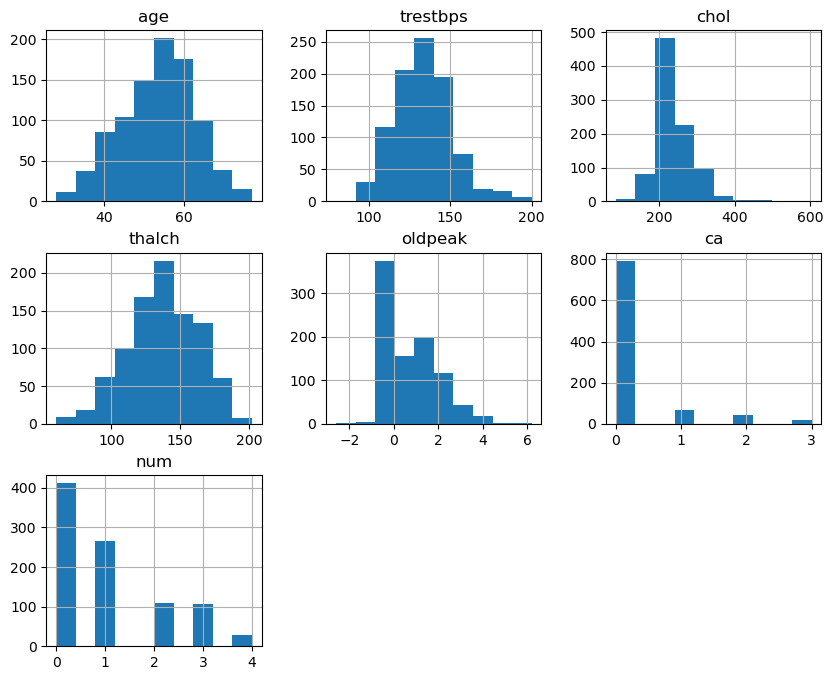

In [77]:
#visualization of patient who have disease or not
df.hist(figsize=(10,8))
plt.show()

In [78]:
df.dtypes

age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalch      float64
exang          bool
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

# Numeric column [age, trestbps, chol, thalch, oldpeak, ca, num]
# Boolean column [fbs, exang]
# Categorical column which need encoding [sex, dataset, cp, restecg, slope, thal]

In [79]:
# Convert boolean to integer
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)

In [80]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


In [81]:
# Convert to numeric
df['sex'] = df['sex'].map({'Female': 0, 'Male': 1})
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,Cleveland,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0
1,67,1,Cleveland,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,2
2,67,1,Cleveland,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1
3,37,1,Cleveland,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
4,41,0,Cleveland,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


In [82]:
categorical_cols = ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']

# Keep only columns that actually exist in df to avoid KeyError if some were dropped earlier
categorical_cols = [c for c in categorical_cols if c in df.columns]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,Cleveland,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0
1,67,1,Cleveland,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,2
2,67,1,Cleveland,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1
3,37,1,Cleveland,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
4,41,0,Cleveland,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


In [83]:
#df['sex'].unique()
df['cp'].unique()
df['restecg'].unique()
df['slope'].unique()
df['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

In [84]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,Cleveland,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0
1,67,1,Cleveland,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,2
2,67,1,Cleveland,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1
3,37,1,Cleveland,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
4,41,0,Cleveland,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


In [85]:
df=df.drop(columns=['dataset'])

In [86]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0
1,67,1,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,2
2,67,1,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1
3,37,1,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
4,41,0,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


In [87]:
# Clean text and convert to numeric
df = df.apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)

df['cp'] = df['cp'].map({'typical angina': 0, 'atypical angina': 1, 'non-anginal': 2, 'asymptomatic': 3})
df['restecg'] = df['restecg'].map({'normal': 0, 'st-t abnormality': 1, 'lv hypertrophy': 2})
df['slope'] = df['slope'].map({'upsloping': 0, 'flat': 1, 'downsloping': 2})
df['thal'] = df['thal'].map({'normal': 1, 'fixed defect': 2, 'reversable defect': 3})


In [88]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,0,145.0,233.0,1,2,150.0,0,2.3,2,0.0,2,0
1,67,1,3,160.0,286.0,0,2,108.0,1,1.5,1,3.0,1,2
2,67,1,3,120.0,229.0,0,2,129.0,1,2.6,1,2.0,3,1
3,37,1,2,130.0,250.0,0,0,187.0,0,3.5,2,0.0,1,0
4,41,0,1,130.0,204.0,0,2,172.0,0,1.4,0,0.0,1,0


In [89]:
df = df.astype({'trestbps': 'int', 'chol': 'int', 'thalch': 'int', 'ca': 'int'})


In [90]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,2
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [91]:
df['num'].unique()

array([0, 2, 1, 3, 4])

In [92]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [93]:
df.rename(columns={'num': 'target'}, inplace=True)

In [94]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [95]:
# Save the cleaned dataset to a new CSV file
df.to_csv("cleaned_heart_dataset.csv", index=False)

In [96]:
clean_heart_disease=pd.read_csv('cleaned_heart_dataset.csv')

In [97]:
clean_heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [98]:
x = clean_heart_disease.drop('target', axis=1)
y = clean_heart_disease['target']

In [99]:
y

0      0
1      1
2      1
3      0
4      0
      ..
915    1
916    0
917    1
918    0
919    1
Name: target, Length: 920, dtype: int64

In [100]:
# choose machine learning model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [101]:
## fit the model befor fit the model split data into train and test
from sklearn.model_selection import train_test_split
#x_train x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [103]:
clf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [104]:
#evaluate the model
predict_y=clf.predict(x_test)
predict_y

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [105]:
#accuracy check for seen data
clf.score(x_train,y_train)

1.0

In [106]:
#accuracy check for unseen data
clf.score(x_test,y_test)

0.7681159420289855

In [58]:
#improve the model
for i in range(10,200,10):
    print(f"running model with {i} estimators")
    clf= RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"accuracy is: {clf.score(x_test,y_test)}")
    

running model with 10 estimators
accuracy is: 0.7536231884057971
running model with 20 estimators
accuracy is: 0.7681159420289855
running model with 30 estimators
accuracy is: 0.7753623188405797
running model with 40 estimators
accuracy is: 0.7753623188405797
running model with 50 estimators
accuracy is: 0.7753623188405797
running model with 60 estimators
accuracy is: 0.7753623188405797
running model with 70 estimators
accuracy is: 0.7681159420289855
running model with 80 estimators
accuracy is: 0.7644927536231884
running model with 90 estimators
accuracy is: 0.7681159420289855
running model with 100 estimators
accuracy is: 0.7753623188405797
running model with 110 estimators
accuracy is: 0.7644927536231884
running model with 120 estimators
accuracy is: 0.7644927536231884
running model with 130 estimators
accuracy is: 0.7681159420289855
running model with 140 estimators
accuracy is: 0.7753623188405797
running model with 150 estimators
accuracy is: 0.7681159420289855
running model with 

In [107]:
#save the model
import pickle
pickle.dump(clf,open('Heart_disease_prediction.pkl', 'wb'))

In [ ]:
# Read the model
